In [1]:
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Preprocessing and Visualization 

In [2]:
import pandas as pd
ufo = pd.read_csv('https://query.data.world/s/txb3budi5zwxuowhd4uvxposulsunz')

In [3]:
# Extract the date information from the stats column, we'll save this in a new column called date, we'll also create a drop column with access info that we will drop later
ufo[['drop', 'date']] = ufo['stats'].str.extract(r'^(?P<drop>Occurred : )(?P<date>[0-9]{1,2}[/][0-9]{1,2}[/][0-9]{4})')

In [4]:
# Set the correct data type for the columns
ufo['date'] = pd.to_datetime(ufo['date'], errors = 'coerce')
ufo['summary'] = ufo['summary'].astype(str)

In [5]:
ufo_copy = ufo

In [6]:
ufo_copy.drop(columns=['date_time', 'stats', 'report_link', 'text', 'posted', 'drop'], inplace=True)

[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Number of Reported Sightings'),
 Text(0.5, 1.0, 'Number of UAP Sightings over the years')]

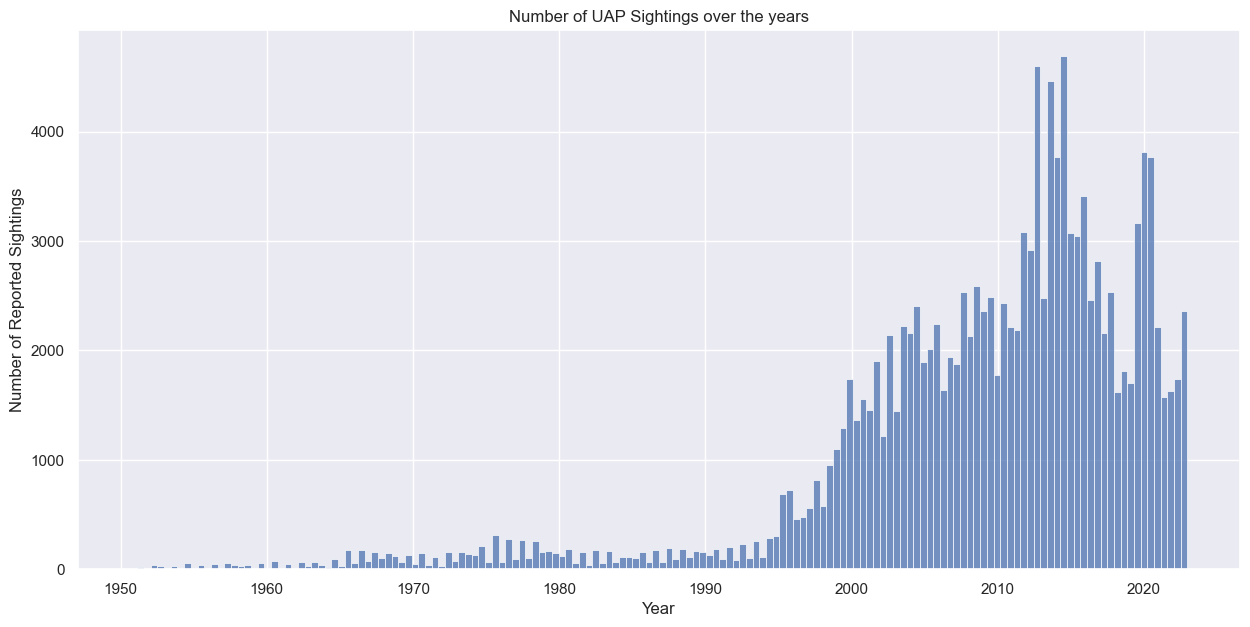

In [8]:
ufo_copy = ufo_copy.loc[ufo_copy['date'] >= '1950-09-01']
sns.set_theme(style='darkgrid')
plt.figure(figsize=(15, 7))

fig = sns.histplot(
    data=ufo_copy,
    x='date',
    fill=True
)

fig.set(xlabel ="Year", ylabel = "Number of Reported Sightings", title ='Number of UAP Sightings over the years')


# Case Study 1: The Malmstrom AFB UFO/Missile Incident

(from chat-gpt):

The Malmstrom AFB UFO/Missile Incident is an event that occurred in March 1967 at the Malmstrom Air Force Base in Montana, USA. Several military personnel reported seeing strange flying objects in the sky, which appeared to be hovering over the base's missile silos. According to some reports, witnesses saw a large red, orange or yellow object hovering over or near the missile silos¹³⁶. Some described it as a disc-shaped craft with flashing lights¹⁴. Others said it looked like a helicopter⁵. 

At the same time, the missile systems in the base began to malfunction, and some of the missiles went offline. This was particularly alarming since these missiles were armed with nuclear warheads. 

The military personnel tried to communicate with their superiors about the incident, but they were instructed not to talk about it. The incident was eventually classified, and no official explanation was given for the strange occurrences. 

The Malmstrom AFB UFO/Missile Incident is often cited as one of the most compelling pieces of evidence for the existence of UFOs and extraterrestrial life. However, skeptics have suggested that the sightings and the missile malfunctions could have had other explanations, such as technical glitches or human error.

Source: Conversation with Bing, 3/16/2023(1) 1967-The Malmstrom AFB UFO/Missile Incident - UFO Casebook. https://ufocasebook.com/1967malmstrom.html Accessed 3/16/2023.
(2) Malmstrom AFB Intrusions - National Investigations Committee On Aerial .... http://www.nicap.org/articles/CI-Malmstrom.htm Accessed 3/16/2023.
(3) UFO Case: Malmstrom AFB UFO/Missile Incident (March 16, 1967). https://www.theblackvault.com/documentarchive/ufo-case-malmstrom-afb-ufomissile-incident-march-16-1967/ Accessed 3/16/2023.
(4) Former Air Force chief claims he once saw UFO firing at nuke missiles .... https://nypost.com/2021/10/21/former-air-force-chief-claims-he-once-saw-ufo-firing-at-nuke-missiles-launched-from-secret-base/ Accessed 3/16/2023.
(5) What Were Those Mysterious Craft? - The Washington Post. https://www.washingtonpost.com/archive/politics/1979/01/19/what-were-those-mysterious-craft/1b9d1f3d-dddb-4a92-87b3-0143aa5d7a3e/ Accessed 3/16/2023.
(6) Malmstrom Air Force Base UFO incident - EverybodyWiki Bios & Wiki. https://en.everybodywiki.com/Malmstrom_Air_Force_Base_UFO_incident Accessed 3/16/2023.

This incident was reported 

In [17]:
ufo_copy2 = ufo_copy.loc[(ufo_copy['date'] >= '1967-03-01') & (ufo_copy['date'] <= '1967-03-31')]
ufo_copy2.head(10)

,summary,country,city,state,shape,duration,city_latitude,city_longitude,date
24174,Grey Banana W/O lights or sound,USA,Norwalk,OH,cigar,2 min.,41.239500,-82.597500,1967-03-15
32082,Close encounter with saucer shaped object.,USA,Galesburg,IL,oval,2 to 3 minutes,40.950900,-90.365800,1967-03-16
35581,My girlfriend and I were having a romantic eve...,USA,Oak Grove,LA,unknown,30 Minutes,32.875300,-91.433900,1967-03-03
37086,Two observers witnessed 500-foot long oval cra...,USA,Whittier,CA,oval,2 seconds,33.974254,-118.030638,1967-03-01
57229,Three incidents that happened to me in the Whi...,USA,Mount Washington,NH,circle,2 min,NaN,NaN,1967-03-10
71395,Why would the Air Force sent a photo-recon jet...,USA,San Angelo,TX,circle,1 hr,31.449417,-100.460325,1967-03-15
84418,6 objects disappear and reappear jumping about...,USA,Hickman,KY,formation,20 minutes,36.557000,-89.197400,1967-03-02
